# [Polynomial Regression](https://www.youtube.com/watch?v=KdYgKnh6Nnc&list=PLD_eiqVVLZDj1onVQPuREzf90xRT2WIdR&index=48)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("regression-one.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness 1-19 years                 34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [4]:
df.rename(columns={'Life expectancy':'life_expect'}, inplace=True)
df = df.dropna()
df.shape

(1649, 22)

In [5]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
life_expect                        0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness 1-19 years                0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [6]:
# check return resultisna record
df[df.isna().any(axis=1)]

,Country,Year,Status,life_expect,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling


In [7]:
X = df['GDP']
Y = df['life_expect']

### Polynomial Model Creation

`np.polyfit()` and `np.poly1d()` are essential code for __Polynomial Regression__.

In [8]:
f3 = np.polyfit(x=X, y=Y, deg=3)
print(f3)
model = np.poly1d(f3)
print(model)

[ 1.24342097e-13 -2.30024902e-08  1.16017200e-03  6.54428180e+01]
           3           2
1.243e-13 x - 2.3e-08 x + 0.00116 x + 65.44


In [9]:
line = np.linspace(X.min(), X.max(), 100)

In [10]:
X.min()

1.68135

In [11]:
X.max()

119172.7418

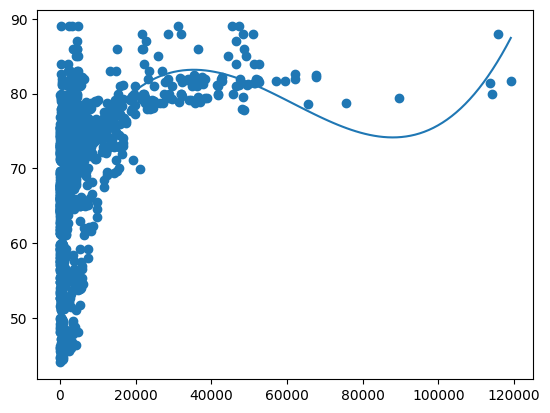

In [12]:
plt.scatter(X, Y)
plt.plot(line, model(line))
plt.show()

In [13]:
pred_life_span = model(60000)
pred_life_span

79.10206621953861

In [14]:
# The Gross Domestic Product per capita in Myanmar was last recorded at 1169.11 US dollars in 2022
# Myanmar GDP per Capita
pred_life_span = model(1170)
pred_life_span

66.76893026732046

### Using Simple Linear Regression

In [15]:
# Using Simple Linear Regression
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(df[['GDP']], Y)

LinearRegression()

In [16]:
slr.predict(np.array(1170).reshape(-1,1))

/home/htetaunglynn/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([67.81515068])

In [17]:
f5 = np.polyfit(x=X, y=Y, deg=5)
model5 = np.poly1d(f5)
print(model5)

           5             4             3             2
8.365e-23 x - 2.273e-17 x + 2.185e-12 x - 9.299e-08 x + 0.001871 x + 64.58


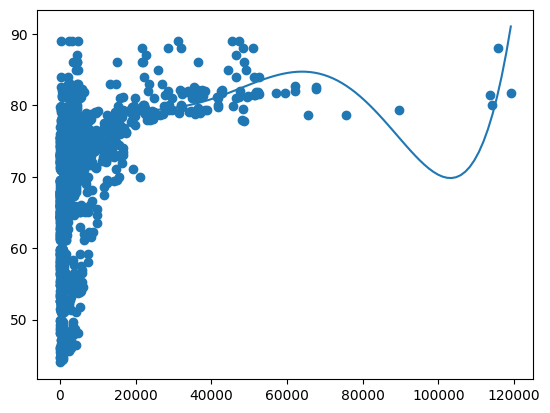

In [18]:
line = np.linspace(X.min(), X.max(), 100)
plt.scatter(X, Y)
plt.plot(line, model5(line))
plt.show()

In [19]:
# The Gross Domestic Product per capita in Myanmar was last recorded at 1169.11 US dollars in 2022
# Myanmar GDP per Capita
model5(1170)


66.64428279870319

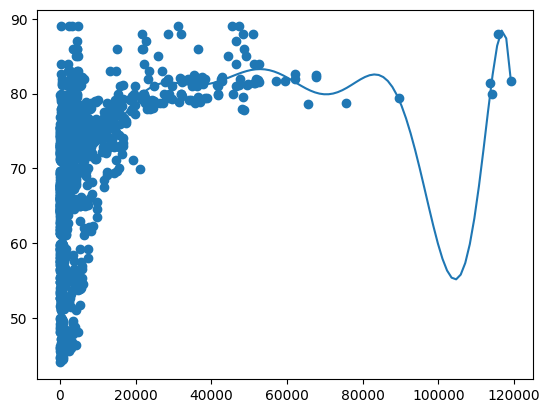

67.36779078487821

In [22]:
f12 = np.polyfit(x=X, y=Y, deg=12)
model12 = np.poly1d(f12)

line = np.linspace(X.min(), X.max(), 100)
plt.scatter(X, Y)
plt.plot(line, model12(line))
plt.show()

model12(1170)